In [1]:
from keras.layers import Dense, Conv2D, Flatten
from keras.models import Sequential
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
df=pd.read_csv('sample_data/mnist_train_small.csv')
df.head()

,6,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32,0.33,0.34,0.35,0.36,0.37,0.38,...,0.551,0.552,0.553,0.554,0.555,0.556,0.557,0.558,0.559,0.560,0.561,0.562,0.563,0.564,0.565,0.566,0.567,0.568,0.569,0.570,0.571,0.572,0.573,0.574,0.575,0.576,0.577,0.578,0.579,0.580,0.581,0.582,0.583,0.584,0.585,0.586,0.587,0.588,0.589,0.590
0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [3]:
xtrain=pd.get_dummies(df,columns=['6'])
xtrain=xtrain.iloc[:,-10:]
xtrain.head()

,6_0,6_1,6_2,6_3,6_4,6_5,6_6,6_7,6_8,6_9
0,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,1,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0


In [6]:
dff=pd.read_csv('sample_data/mnist_test.csv')
xtest=pd.get_dummies(dff,columns=['7'])
xtest=xtest.iloc[:,-10:]
xtest=xtest.values
xtest

array([[0, 0, 1, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [7]:
df.drop('6',axis=1,inplace=True)
ytrain=df.values
dff.drop('7',axis=1,inplace=True)
ytest=dff.values
print(ytrain.shape,ytest.shape)

(19999, 784) (9999, 784)


In [8]:
(xtrain,ytrain)=(ytrain,xtrain)
(xtest,ytest)=(ytest,xtest)
print(xtrain.shape)
print(ytest.shape)

(19999, 784)
(9999, 10)


In [0]:
xtrain=xtrain.reshape(xtrain.shape[0],28,28,1)
xtest=xtest.reshape(xtest.shape[0],28,28,1)

In [0]:
model=Sequential()
model.add(Conv2D(64,kernel_size=3,input_shape=(28,28,1),activation='relu'))
model.add(Conv2D(32,kernel_size=3,activation='relu'))
model.add(Flatten())
model.add(Dense(10,activation='softmax'))

In [0]:
model.compile('adam','categorical_crossentropy',['accuracy'])

In [16]:
model.fit(xtrain,ytrain,100,5,validation_data=(xtest,ytest))


Train on 19999 samples, validate on 9999 samples
Epoch 1/5
19999/19999 [==============================] - 67s 3ms/step - loss: 2.0658 - acc: 0.8181 - val_loss: 0.1312 - val_acc: 0.9632
Epoch 2/5
19999/19999 [==============================] - 67s 3ms/step - loss: 0.0855 - acc: 0.9745 - val_loss: 0.1046 - val_acc: 0.9668
Epoch 3/5
19999/19999 [==============================] - 67s 3ms/step - loss: 0.0411 - acc: 0.9876 - val_loss: 0.1396 - val_acc: 0.9628
Epoch 4/5
19999/19999 [==============================] - 67s 3ms/step - loss: 0.0243 - acc: 0.9919 - val_loss: 0.1336 - val_acc: 0.9686
Epoch 5/5
19999/19999 [==============================] - 67s 3ms/step - loss: 0.0141 - acc: 0.9955 - val_loss: 0.1640 - val_acc: 0.9645


[6]
[[0 0 0 0 0 0 1 0 0 0]]


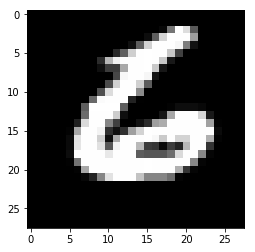

In [23]:
print(np.argmax(model.predict(xtest[-1:]),axis=1))
print(ytest[-1:])
img=xtest[-1:].reshape(28,28)
plt.imshow(img,cmap='gray')